In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# import matplotlib to show plots inline.
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import glob
import os

In [3]:
# import maf python modules
import lsst.sims.maf.db as db
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.stackers as stackers
import lsst.sims.maf.plots as plots
import lsst.sims.maf.metricBundles as metricBundles

In [4]:
# import convenience functions
import sys 
sys.path.append("../../LSST_OpSim")
from Scripts_NBs.opsimUtils import *

In [5]:
your_username = "rjassef"
#folder_mafoutput = "EM5_depths"
folder_mafoutput = "Lstar_dust"
resultDbPath = '/home/idies/workspace/Storage/{0}/persistent/MAFOutput/{1}'.format(
    your_username, folder_mafoutput)
metricDataPath = '/home/idies/workspace/Storage/{0}/persistent/MAFOutput/{1}/MetricData/'.format(
    your_username, folder_mafoutput)

In [6]:
# get a dictionary of resultDb from given directory
resultDbs = getResultsDbs(resultDbPath)

In [7]:
# retrieve metricBundles for each opsim run and store them in a dictionary
import re
bundleDicts = {}
FBS = "v1.6"
for runName in resultDbs:
    if not re.search(FBS,runName):
        continue
    bdaux = bundleDictFromDisk(resultDbs[runName], runName, metricDataPath)
    dict_aux = dict()
    for key in bdaux.keys():
        if key[1]=='log_QLF_Lstar_frac':
            if bdaux[key].constraint == 'filter = "u" and note not like "DD%"':
                dict_aux[(1,key[1])] = bdaux[key]
            else:
                dict_aux[(2,key[1])] = bdaux[key]
    bundleDicts[runName] = dict_aux

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSID

In [8]:
# check keys
dbRuns = list(resultDbs.keys())
bd_keys = list(bundleDicts[dbRuns[1]].keys())
print(bd_keys)

[(1, 'log_QLF_Lstar_frac'), (2, 'log_QLF_Lstar_frac')]


In [9]:
uKey, gKey = (1, 'log_QLF_Lstar_frac'), (2, 'log_QLF_Lstar_frac')

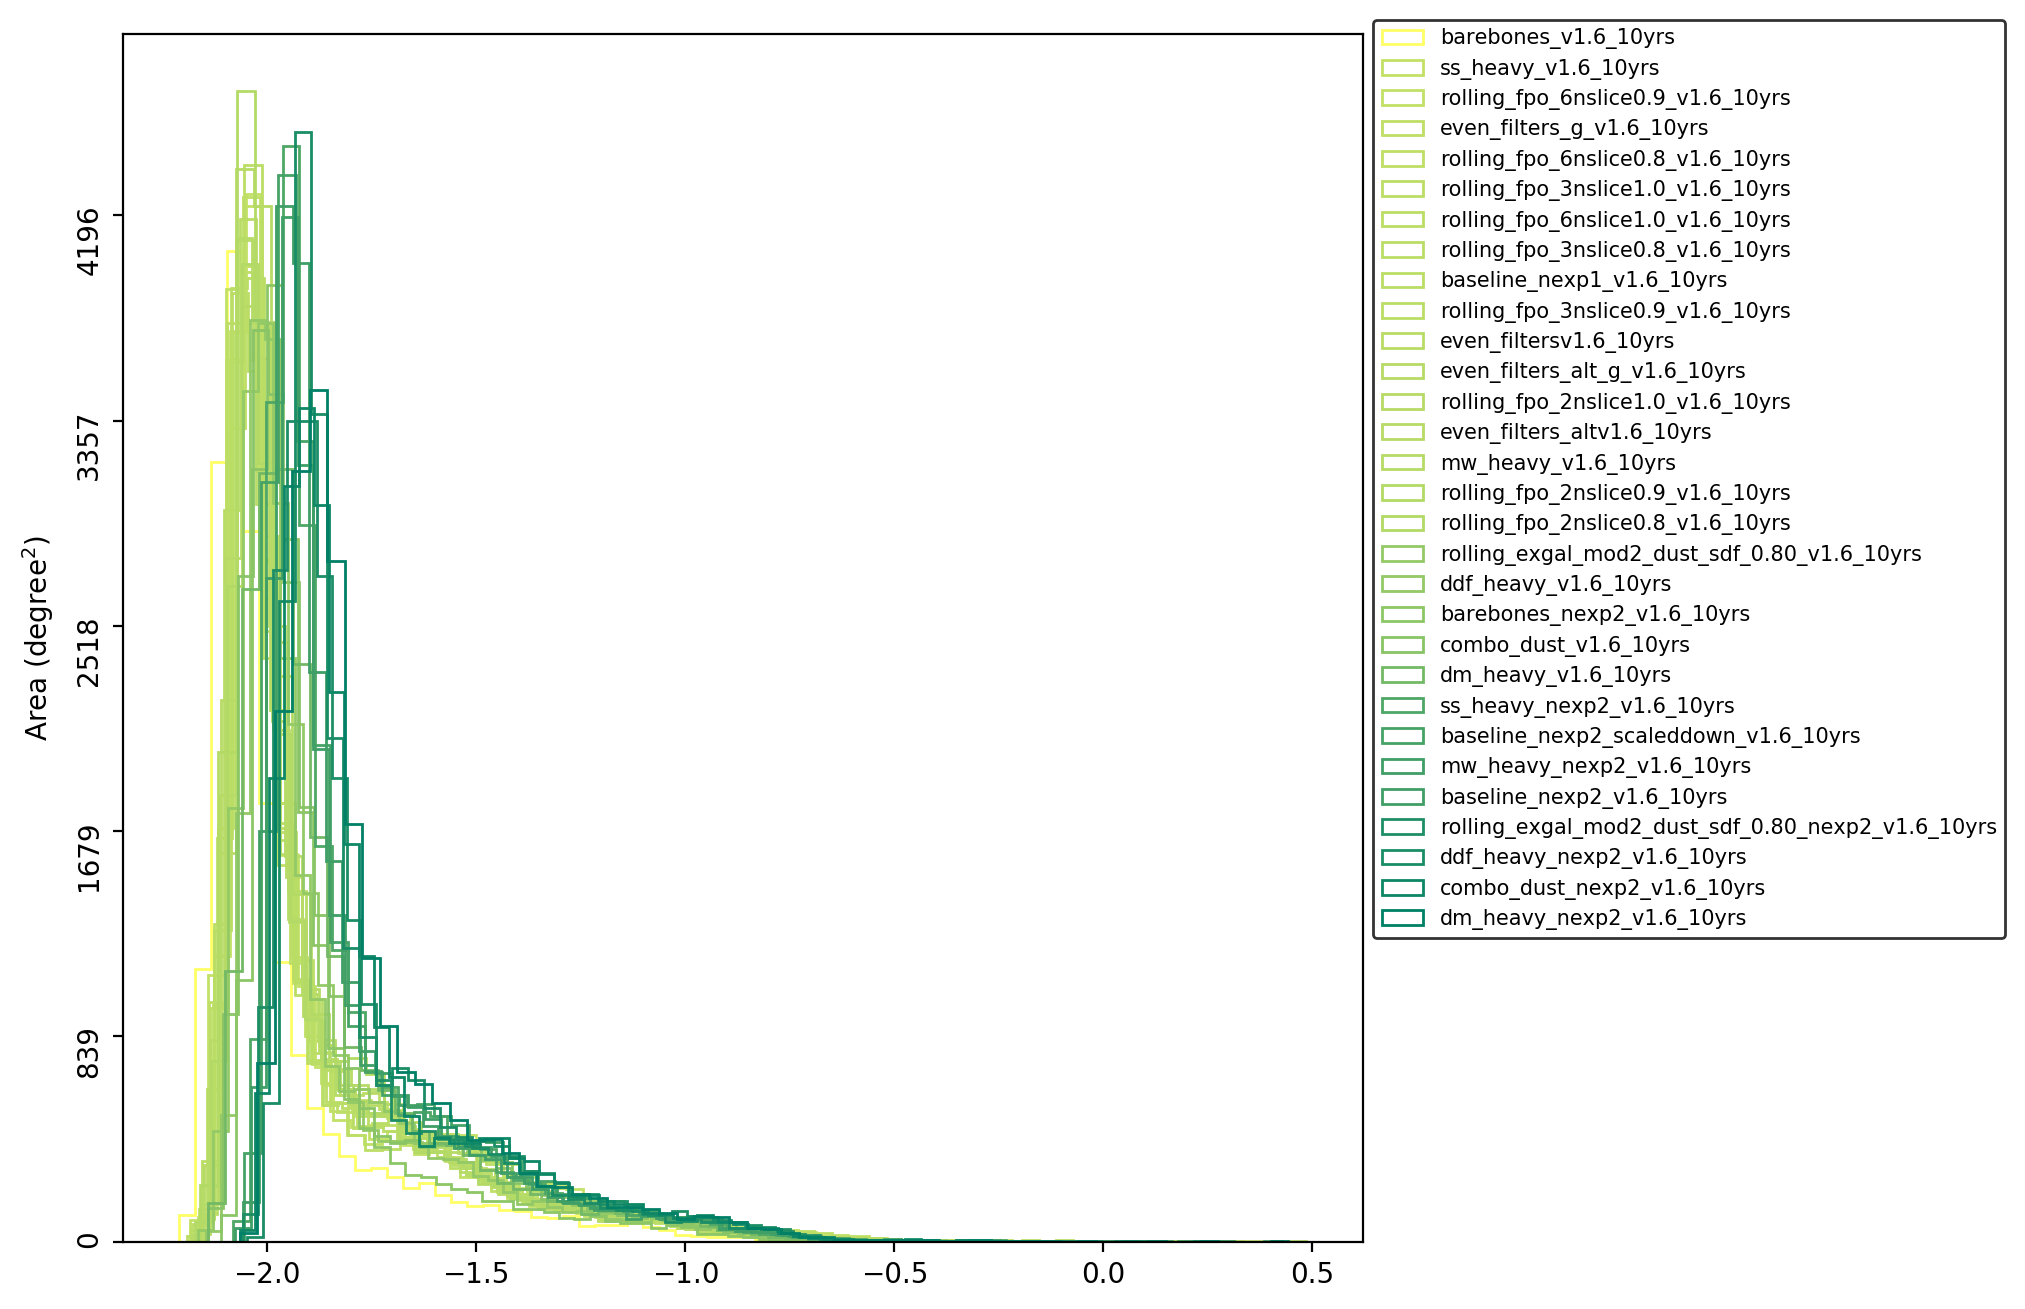

In [12]:
import matplotlib as mpl
import sys 
sys.path.append("..")
from plot_OpSims import plot_OpSims_hist

#User summer color map
#color_map = mpl.cm.summer

data_func = None
#data_func = np.abs

plot_OpSims_hist(uKey, bundleDicts, figsize=(8,8))
